# Decision Tree Classification

**Параметры**: набор данных, критерий выбора атрибута разбиения (Information gain, Gain ratio, Gini index), доля, которую занимает обучающая выборка от общего размера набора данных.

**Вывод**: аккуратность (accuracy), точность (precision), полнота (recall), F-мера.
В качестве обучающей выборки для построения дерева используйте 100% исходных данных.
визуализацию построенных деревьев решений

Проведите эксперименты на ранее выбранных наборах данных, фиксируя критерий выбора атрибута разбиения и варьируя соотношение мощностей обучающей и тестовой выборок от 60%:40% до 90%:10% с шагом 10%.


While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous.

In [76]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics 
from sklearn import tree
%matplotlib inline

In [67]:
def get_splitted_train_test(df, class_col, test_size):
    # Declare feature vector and target variable 
    X = df.drop([class_col], axis=1)
    y = df[class_col]
    # Split data into separate training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    return (X_train, X_test, y_train, y_test)

In [61]:
def get_encoded_X_data(cols, X_train, X_test):
    # encode variables with ordinal encoding
    encoder = ce.OrdinalEncoder(cols=cols)
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)
    return (X_train, X_test)


# Get Started Here

## Define Input Parameters

In [82]:
DATASET_PATH = os.path.join('datasets','grades.csv')
CLASS = "GRADE"

TEST_SIZE = 0.4 # in interval (0,1)
CRITERION = 'gini' # gini index
# CRITERION = 'entropy' # information gain

dataset = pd.read_csv(DATASET_PATH)

In [83]:
# Split train and test data
X_train, X_test, y_train, y_test= get_splitted_train_test(dataset, CLASS, TEST_SIZE)

COLS = X_train.columns.values.tolist()
# Encode categorical variables
X_train, X_test = get_encoded_X_data(COLS, X_train, X_test)

# Create and fit model
model = DecisionTreeClassifier(criterion=CRITERION, max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


[Text(0.4090909090909091, 0.875, 'X[2] <= 1.5\ngini = 0.804\nsamples = 43\nvalue = [4, 8, 1, 14, 5, 5, 6]'),
 Text(0.18181818181818182, 0.625, 'X[5] <= 1.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 5, 4]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(0.6363636363636364, 0.625, 'X[2] <= 5.5\ngini = 0.735\nsamples = 34\nvalue = [4, 8, 1, 14, 5, 0, 2]'),
 Text(0.45454545454545453, 0.375, 'X[5] <= 5.5\ngini = 0.583\nsamples = 12\nvalue = [1, 7, 0, 3, 1, 0, 0]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.512\nsamples = 11\nvalue = [0, 7, 0, 3, 1, 0, 0]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.8181818181818182, 0.375, 'X[1] <= 1.5\ngini = 0.686\nsamples = 22\nvalue = [3, 1, 1, 11, 4, 0, 2]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1, 0, 0

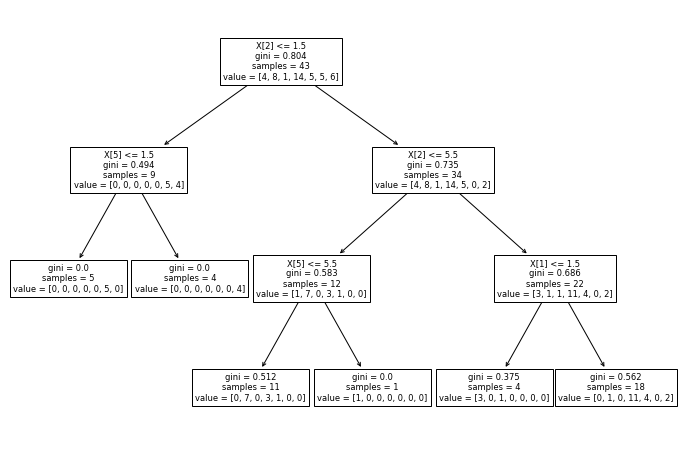

In [84]:
# Visualize decision-tree

plt.figure(figsize=(12,8))
tree.plot_tree(model.fit(X_train, y_train))

In [93]:
# Metrics

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(sklearn.metrics.accuracy_score(y_test, y_pred)))
print('Model precision score with criterion gini index: {0:0.4f}'. format(sklearn.metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Model recall score with criterion gini index: {0:0.4f}'. format(sklearn.metrics.recall_score(y_test, y_pred, average='weighted', zero_division=1)))
print('Model fbeta score with criterion gini index: {0:0.4f}'. format(sklearn.metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5)))

Model accuracy score with criterion gini index: 0.3448
Model precision score with criterion gini index: 0.5408
Model recall score with criterion gini index: 0.3448
Model fbeta score with criterion gini index: 0.3525
